In [100]:
!git clone https://github.com/mlcuva/nlp-politics.git
  
import pandas as pd
f = open('./nlp-politics/debate.txt').read().split('\n')
  
speakers = []
speech = []
for line in range(len(f)):
  if f[line] == "":
    speakers.append(f[line-1])
    speech.append(f[line+1])

#df = pd.DataFrame(list(zip(speakers, speech)), columns=['Speaker','Speech']) 

fatal: destination path 'nlp-politics' already exists and is not an empty directory.


In [0]:
df = pd.DataFrame(zip(speakers, speech), columns=['Speaker','Speech'])

In [0]:
df.to_csv('nlp-politics/democratic_debate.csv', index=False)

In [0]:
df.reset_index(drop=True, inplace=True)

In [317]:
df.tail()

,Speaker,Speech
615,WARREN,"And when I got to the end, I realized that Mue..."
616,WARREN,"And so at that moment, I called for opening an..."
617,WARREN,"Now, that didn't happen"
618,WARREN,And look what happened as a result
619,WARREN,Donald Trump broke the law again in the summer...


In [0]:
dftest = df.head()

In [0]:
def extraData(p, dftest):
  p.replace("?", ".")
  p.replace("!", ".")

  sentences = p.split(". ")
  numberOfSentences = len(TextBlob(p).sentences)
  values = dftest['Speech'].str.contains(p)
  speakerName = dftest['Speaker'].iloc[dftest['Speech'].str.contains(p).tolist().index(True)]

  listSpeaker = []
  listSpeech = []

  for i in range(0, numberOfSentences):
    listSpeaker.append(speakerName)
  for j in sentences:
    listSpeech.append(j)

  return(pd.DataFrame(zip(listSpeaker, listSpeech), columns=['Speaker', 'Speech']))

In [0]:
for i in range(0, 5):
  dftest = pd.concat([dftest, extraData(dftest['Speech'].iloc[i], dftest)])

In [326]:
dftest.reset_index(drop = True, inplace=True)
dftest.tail()

,Speaker,Speech
25,WARREN,"And when I got to the end, I realized that Mue..."
26,WARREN,"And so at that moment, I called for opening an..."
27,WARREN,"Now, that didn't happen"
28,WARREN,And look what happened as a result
29,WARREN,Donald Trump broke the law again in the summer...


In [314]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 620 entries, 0 to 0
Data columns (total 2 columns):
Speaker    620 non-null object
Speech     620 non-null object
dtypes: object(2)
memory usage: 14.5+ KB


In [322]:
for x in range(0, 620):
  df = pd.concat([df, extraData(df['Speech'].iloc[i], dftest)])

df.info()

ValueError: ignored

In [70]:
df['Speaker'].value_counts()

MODERATOR    242
WARREN        57
BIDEN         33
BUTTIGIEG     29
SANDERS       27
O'ROURKE      25
HARRIS        21
KLOBUCHAR     21
BOOKER        16
GABBARD       13
YANG          12
CASTRO        11
STEYER         8
UNKNOWN        5
Name: Speaker, dtype: int64

In [0]:
from textblob import TextBlob

In [72]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [73]:
test = df.loc[0, 'Speech']
test
TextBlob(test).sentiment.polarity

0.22467532467532467

In [0]:
df['polarity'] = df['Speech'].apply(lambda x : TextBlob(x).sentiment.polarity)

In [0]:
df['subjectivity'] = df['Speech'].apply(lambda x : TextBlob(x).sentiment.subjectivity)

In [0]:
df['Sentence Length'] = df['Speech'].apply(lambda x : len(TextBlob(x).words))
df['Number of Sentences'] = df['Speech'].apply(lambda x : len(TextBlob(x).sentences))
df['Average Word Length'] = df['Speech'].apply(lambda x : len(x.replace(" ", ""))/len(TextBlob(x).words))

In [77]:
df.head()

,Speaker,Speech,polarity,subjectivity,Sentence Length,Number of Sentences,Average Word Length
0,MODERATOR,"And live from Otterbein University, just north...",0.224675,0.450649,116,5,5.241379
1,MODERATOR,The top 12 Democratic presidential candidates ...,0.178571,0.532143,37,2,5.432432
2,MODERATOR,"Before we begin, a reminder of the ground rule...",0.000000,0.000000,43,3,5.325581
3,MODERATOR,And we remind our audience here in the Rike Ce...,0.080102,0.468197,104,6,4.826923
4,WARREN,Because sometimes there are issues that are bi...,0.107143,0.535714,118,9,4.516949


In [0]:
Polarity = pd.DataFrame(df['polarity'].groupby(df['Speaker']).mean())
Subjectivity = pd.DataFrame(df['subjectivity'].groupby(df['Speaker']).mean())
WordCount = pd.DataFrame(df['Sentence Length'].groupby(df['Speaker']).mean())
SentenceCount = pd.DataFrame(df['Number of Sentences'].groupby(df['Speaker']).mean())
WordLength = pd.DataFrame(df['Average Word Length'].groupby(df['Speaker']).mean())

In [79]:
import functools

dfs = [Polarity, Subjectivity, WordCount, SentenceCount, WordLength]

candidates = functools.reduce(lambda left,right: pd.merge(left,right,on='Speaker'), dfs)
candidates

,polarity,subjectivity,Sentence Length,Number of Sentences,Average Word Length
Speaker,,,,,
BIDEN,0.095478,0.329953,97.000000,6.727273,4.009753
BOOKER,0.206316,0.425058,145.125000,7.562500,4.405017
BUTTIGIEG,0.057423,0.366726,91.517241,4.896552,4.528988
CASTRO,0.131126,0.414115,154.000000,7.090909,4.694494
GABBARD,0.045208,0.446495,117.538462,5.153846,4.480855
HARRIS,0.044829,0.341103,109.857143,6.476190,4.272024
KLOBUCHAR,0.061384,0.273795,125.952381,7.809524,4.068875
MODERATOR,0.045510,0.141684,17.487603,1.995868,5.558757
O'ROURKE,0.088645,0.339583,105.080000,5.160000,4.412620


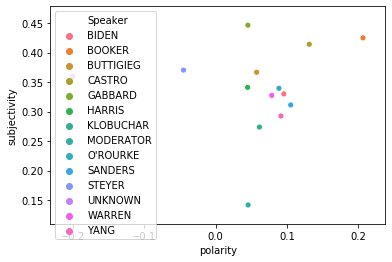

In [80]:
import seaborn as sns

sns.scatterplot(x='polarity', y='subjectivity', data=candidates, hue=candidates.index)

In [0]:
#Future idea: parse out all the sentence and add them as new rows in the same data frame (increaseing the data significantly)

In [82]:
df['Number of Sentences'].sum()

2093